# Proyek Analisis Data: Bike Sharing Data Set
- **Nama:** Audrey Naila Putri
- **Email:** audreynailaputri15@gmail.com
- **ID Dicoding:** audreynaila

# Keterangan Perusahaan

- Perusahaan Bike adalah penyedia layanan sewa sepeda atau sistem transportasi berbasis sepeda. , yang berfokus pada penggunaan harian dan per jam. Perusahan bike memungkinkan pengguna untuk menyewa sepeda untuk keperluan transportasi, rekreasi, atau kegiatan sehari-hari lainnya. Dengan menyediakan layanan ini, perusahaan berusaha untuk memfasilitasi mobilitas yang ramah lingkungan dan sehat bagi masyarakat.

- Dengan data yang dikumpulkan dari dataset, perusahaan dapat menganalisis pola penggunaan sepeda, mengidentifikasi tren dan preferensi pengguna, serta merancang strategi layanan yang lebih baik sesuai dengan kebutuhan pelanggan dan kondisi lingkungan sekitar.

- Dengan informasi ini, perusahaan dapat terus meningkatkan layanan, mengoptimalkan alokasi sepeda, dan meningkatkan kepuasan pelanggan serta memberikan kontribusi positif terhadap lingkungan

## Menentukan Pertanyaan Bisnis

- 1. Bagaimana pola penggunaan sepeda berubah sepanjang tahun?
- 2. Bagaimana pola penggunaan sepeda berbeda antara hari kerja , hari biasa dan hari libur?
- 3. Apakah kondisi cuaca memengaruhi tingkat penggunaan sepeda?
- 4. Bagaimana distribusi penggunaan sepeda berdasarkan musim dan jenis cuaca?

## Import Semua Packages/Library yang Digunakan

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans



# ***Data Wrangling***

### Gathering Data

- Menampilkan Tabel Days

In [23]:
days_df = pd.read_csv("https://raw.githubusercontent.com/audreynaila/visualization_bike/main/data_bike/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Menampilkan Tabel Hours

In [24]:
hours_df = pd.read_csv("https://raw.githubusercontent.com/audreynaila/visualization_bike/main/data_bike/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# ***Assessing Data***

# Data Days

- 1. Menilai Data Day

In [25]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Keterangan 1 : Terlihat bahwa tidak ada nilai null dalam setiap kolomnya (Non-Null Count untuk setiap kolom adalah 731). Menunjukkan bahwa setiap kolom memiliki 731 entri yang tidak bernilai null, yang konsisten dengan jumlah total entri, yaitu 731

- Namun pada bagian kolum dteday menggunakan object biasanya lebih disarankan untuk mengonversi kolom tanggal ke tipe data datetime

- 2.  Melihat Missing Value Data

In [26]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Keterangan 2 : Tidak terdapat missing value pada tabels days

- 3. Melihat Duplikasi Data

In [27]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


In [28]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Hasil Assesing Data Days** : Pada data Days tidak diperlukan tahap cleaning missing value dan duplikat data , masalah cleaning data yang diperlukan adalah perubahan tipe data pada dteday

# Data Hours

- 1. Menilai Data Hours

In [29]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Keterangan 1 : Terlihat tidak terlihat pada data hours_df. Setiap kolom memiliki 17379 entri non-null, yang sesuai dengan jumlah total entri, yaitu 17379

- Namun pada bagian kolum dteday menggunakan object biasanya lebih disarankan untuk mengonversi kolom tanggal ke tipe data datetime

- 2. Melihat Missing Value

In [30]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Keterangan 2 : Tidak terdapat missing value pada tabels hours

- 3. Melihat Duplikasi Data

In [31]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Hasil Assesing Data Hours** : Pada data Hours tidak diperlukan tahap cleaning missing value dan duplikat data , masalah cleaning data yang diperlukan adalah perubahan tipe data pada dteday

# ***Cleaning Data***

# Data Days

- Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom dteday.
- Untuk mengatasi masalah ini,akan mengganti tipe data pada kolom dteday menjadi datetime. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas

In [32]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  days_df[column] = pd.to_datetime(days_df[column])

- Memastikan data telah diperbarui dengan method df.info()

In [33]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

# Data Hours

- Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom dteday.
- Untuk mengatasi masalah ini,akan mengganti tipe data pada kolom dteday menjadi datetime. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas

In [34]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hours_df[column] = pd.to_datetime(hours_df[column])

- Memastikan data telah diperbarui dengan method df.info()

In [35]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

# Eksplore Data Bike dengan all_df

- Mengeksplorasi data days_df, Dataset ini memuat berbagai informasi terkait instant, dteday, season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atempt,hum,windspeed,casual,registred,cnt.

In [100]:
days_df.describe(include="all", datetime_is_numeric=True)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


- Mengeksplorasi data hours_df, Dataset ini memuat berbagai informasi terkait instant, dteday, season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atempt,hum,windspeed,casual,registred,cnt.

In [101]:
hours_df.describe(include="all", datetime_is_numeric=True)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


- Menampung semua informasi dari kedua tabel

In [58]:
all_df = pd.merge(
    left=hours_df,
    right=days_df,
    how="left",
    left_on=["dteday", "instant"],
    right_on=["dteday", "instant"]
)

print(all_df.head())

   instant     dteday  season_x  yr_x  mnth_x  hr  holiday_x  weekday_x  \
0        1 2011-01-01         1     0       1   0          0          6   
1        2 2011-01-01         1     0       1   1          0          6   
2        3 2011-01-01         1     0       1   2          0          6   
3        4 2011-01-01         1     0       1   3          0          6   
4        5 2011-01-01         1     0       1   4          0          6   

   workingday_x  weathersit_x  ...  weekday_y  workingday_y  weathersit_y  \
0             0             1  ...        6.0           0.0           2.0   
1             0             1  ...        NaN           NaN           NaN   
2             0             1  ...        NaN           NaN           NaN   
3             0             1  ...        NaN           NaN           NaN   
4             0             1  ...        NaN           NaN           NaN   

     temp_y   atemp_y     hum_y  windspeed_y  casual_y  registered_y  cnt_y  
0  0.344

**Keterangan :** Hasil penggabungan data hours dan day memiliki atribut yang sama sehingga kolom-kolom yang berasal dari hours_df akan diberi label x, sedangkan yang berasal dari days_df akan diberi label y.

- Persebaran Data pada mnth dan cnt total untuk pengunaan sepeda yang akan dilihat pengunaan dalam setahun

In [64]:
monthly_usage = all_df.groupby('mnth_x')['cnt_x'].sum().reset_index()

print(monthly_usage)

    mnth_x   cnt_x
0        1  134933
1        2  151352
2        3  228920
3        4  269094
4        5  331686
5        6  346342
6        7  344948
7        8  351194
8        9  345991
9       10  322352
10      11  254831
11      12  211036


- Melihat Hasil Penggunaan sepeda (cnt) untuk setiap bulan (mnth) dalam setahun yang dapat dilihat dari data hours menghitung rata-ratanya

In [67]:
monthly_usage = all_df.groupby('mnth_y')['cnt_y'].mean().reset_index()

print(monthly_usage)

    mnth_x       cnt_x
0        1   94.424773
1        2  112.865026
2        3  155.410726
3        4  187.260960
4        5  222.907258
5        6  240.515278
6        7  231.819892
7        8  238.097627
8        9  240.773138
9       10  222.158511
10      11  177.335421
11      12  142.303439


- Mengolompokan data pada holiday, weekday dan workingday

In [69]:
# Mengelompokkan data berdasarkan kolom 'holiday', 'weekday', dan 'workingday'
grouped_data = all_df.groupby(['holiday_x', 'weekday_x', 'workingday_x']).size().reset_index(name='count')

print(grouped_data)

    holiday_x  weekday_x  workingday_x  count
0           0          0             0   2502
1           0          1             1   2122
2           0          2             1   2430
3           0          3             1   2451
4           0          4             1   2423
5           0          5             1   2439
6           0          6             0   2512
7           1          1             0    357
8           1          2             0     23
9           1          3             0     24
10          1          4             0     48
11          1          5             0     48


- Menampilkan distribusi penggunaan sepeda berdasarkan musim dan jenis cuaca

In [70]:
distribution = all_df.groupby(['season_x', 'weathersit_x']).agg({'cnt_x': 'sum'}).reset_index()

print(distribution)

    season_x  weathersit_x   cnt_x
0          1             1  325278
1          1             2  124205
2          1             3   21642
3          1             4     223
4          2             1  664463
5          2             2  207363
6          2             3   46763
7          3             1  801941
8          3             2  212932
9          3             3   46256
10         4             1  546491
11         4             2  251452
12         4             3   43670


- Menampilkan kolom weather pada data hours

In [71]:
# Memilih kolom 'weathersit' dan saya memberikan judul kolom
weathersit_data = all_df[['weathersit_y']]
weathersit_data.columns = ['Weather Situation']

print(weathersit_data.head())

   Weather Situation
0                2.0
1                NaN
2                NaN
3                NaN
4                NaN


- Menampilkan ringkasan statistik untuk penggunaan sepeda berdasarkan kondisi cuaca

In [74]:
weather_summary = all_df.groupby('weathersit_y')['cnt_y'].describe()

print(weather_summary)

              count   mean  std    min    25%    50%    75%    max
weathersit_y                                                      
2.0             1.0  985.0  NaN  985.0  985.0  985.0  985.0  985.0


- Menampilkan distribusi penggunaan sepeda berdasarkan musim dan jenis cuaca

In [77]:
distribution = all_df.groupby(['season_x', 'weathersit_x']).agg({'cnt_x': 'sum'}).reset_index()

print(distribution)

    season_x  weathersit_x   cnt_x
0          1             1  325278
1          1             2  124205
2          1             3   21642
3          1             4     223
4          2             1  664463
5          2             2  207363
6          2             3   46763
7          3             1  801941
8          3             2  212932
9          3             3   46256
10         4             1  546491
11         4             2  251452
12         4             3   43670


## Visualization & Explanatory Analysis

### Pertanyaan 1:

# 1. Bagaimana pola penggunaan sepeda berubah sepanjang tahun?

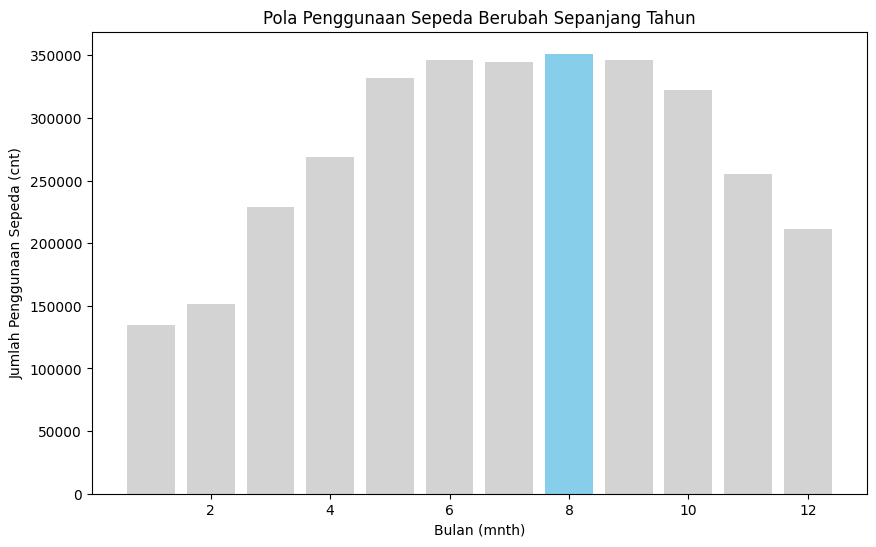

In [83]:
pola_penggunaan_sepeda_berubah = all_df.groupby('mnth_x')['cnt_x'].sum().reset_index()

bulan_tertinggi = pola_penggunaan_sepeda_berubah.loc[pola_penggunaan_sepeda_berubah['cnt_x'].idxmax(), 'mnth_x']

colors = ['skyblue' if bulan == bulan_tertinggi else 'lightgrey' for bulan in pola_penggunaan_sepeda_berubah['mnth_x']]

plt.figure(figsize=(10, 6))
plt.bar(pola_penggunaan_sepeda_berubah['mnth_x'], pola_penggunaan_sepeda_berubah['cnt_x'], color=colors)
plt.xlabel('Bulan (mnth)')
plt.ylabel('Jumlah Penggunaan Sepeda (cnt)')
plt.title('Pola Penggunaan Sepeda Berubah Sepanjang Tahun')
plt.show()

**Keterangan :**
Output yang dihasilkan, pola penggunaan sepeda sepanjang tahun dapat diidentifikasi. Pada bulan ke-8, tingkat penggunaan sepeda mencapai puncaknya dengan jumlah cnt sebesar 8.

### Pertanyaan 2:

# 2. Bagaimana pola penggunaan sepeda berbeda antara hari kerja , hari biasa dan hari libur?

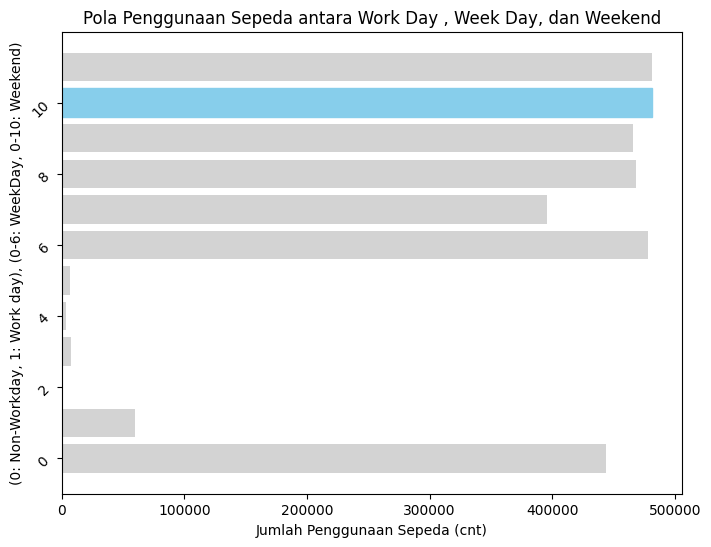

In [84]:
pola_penggunaan_sepeda_hari = all_df.groupby(['workingday_x', 'weekday_x', 'holiday_x'])['cnt_x'].sum().reset_index()

indeks_max = pola_penggunaan_sepeda_hari['cnt_x'].idxmax()


plt.figure(figsize=(8, 6))
bars = plt.barh(pola_penggunaan_sepeda_hari.index, pola_penggunaan_sepeda_hari['cnt_x'], color='lightgrey')


bars[indeks_max].set_color('skyblue')

plt.xlabel('Jumlah Penggunaan Sepeda (cnt)')
plt.ylabel('(0: Non-Workday, 1: Work day), (0-6: WeekDay, 0-10: Weekend)')
plt.title('Pola Penggunaan Sepeda antara Work Day , Week Day, dan Weekend')
plt.yticks(rotation=45)
plt.show()


**Keterangan :**

Dari analisis pola penggunaan sepeda yang dilakukan, terlihat bahwa penggunaan sepeda memiliki variasi yang signifikan tergantung pada kondisi hari, baik itu hari libur, hari kerja, maupun hari biasa. Penggunaan sepeda cenderung meningkat pada hari libur, yang mungkin disebabkan oleh waktu luang yang lebih banyak pada hari-hari tersebut, sehingga masyarakat lebih cenderung untuk bersepeda dan menikmati aktivitas di luar ruangan.

Sementara itu, perbedaan dalam penggunaan sepeda antara hari kerja dan hari biasa juga dapat diamati, meskipun tidak sebesar perbedaan dengan hari libur. Penggunaan sepeda pada hari biasa cenderung sedikit lebih tinggi daripada pada hari kerja, menunjukkan bahwa orang mungkin memiliki lebih banyak waktu luang dan kesempatan untuk bersepeda pada hari-hari tersebut.

 # 3. Apakah kondisi cuaca memengaruhi tingkat penggunaan sepeda?

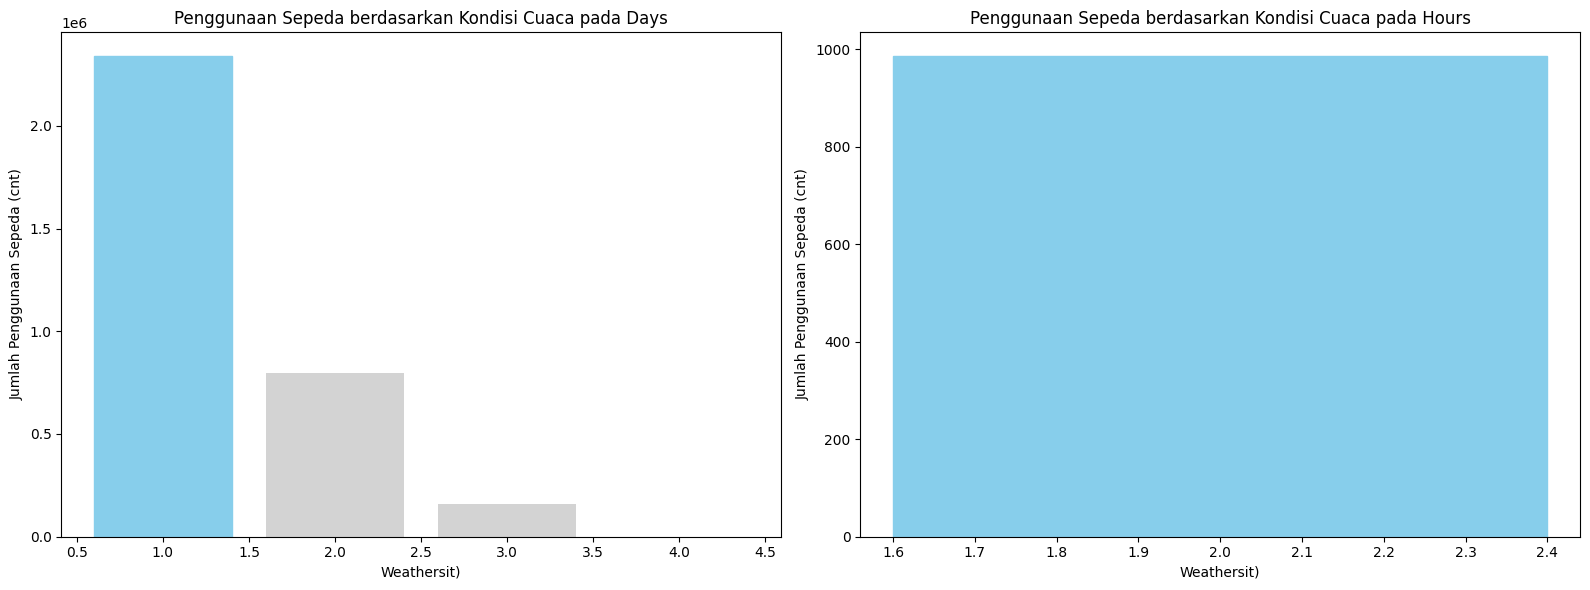

In [97]:
penggunaan_sepeda_cuaca_x = all_df.groupby('weathersit_x')['cnt_x'].sum().reset_index()

penggunaan_sepeda_cuaca_y = all_df.groupby('weathersit_y')['cnt_y'].sum().reset_index()

indeks_max_x = penggunaan_sepeda_cuaca_x['cnt_x'].idxmax()
indeks_max_y = penggunaan_sepeda_cuaca_y['cnt_y'].idxmax()

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
bars_x = plt.bar(penggunaan_sepeda_cuaca_x['weathersit_x'], penggunaan_sepeda_cuaca_x['cnt_x'], color='lightgrey')
bars_x[indeks_max_x].set_color('skyblue')
plt.xlabel('Weathersit)')
plt.ylabel('Jumlah Penggunaan Sepeda (cnt)')
plt.title('Penggunaan Sepeda berdasarkan Kondisi Cuaca pada Days')

plt.subplot(1, 2, 2)
bars_y = plt.bar(penggunaan_sepeda_cuaca_y['weathersit_y'], penggunaan_sepeda_cuaca_y['cnt_y'], color='lightgrey')
bars_y[indeks_max_y].set_color('skyblue')
plt.xlabel('Weathersit)')
plt.ylabel('Jumlah Penggunaan Sepeda (cnt)')
plt.title('Penggunaan Sepeda berdasarkan Kondisi Cuaca pada Hours')

plt.tight_layout()
plt.show()


**Keterangan :**

Berdasarkan analisis penggunaan sepeda pada dua kategori data yang berbeda, yaitu pada Days dan Hours, terlihat bahwa kondisi cuaca memengaruhi tingkat penggunaan sepeda.

Mengamati data harian, penggunaan sepeda selama satu hari akan dicatat sebagai satu poin data, sementara pada data per jam, penggunaan sepeda akan dicatat setiap jam. Oleh karena itu, jumlah penggunaan sepeda pada data per jam akan jauh lebih tinggi dibandingkan dengan data per hari.

# 4. Bagaimana distribusi penggunaan sepeda berdasarkan musim dan jenis cuaca?

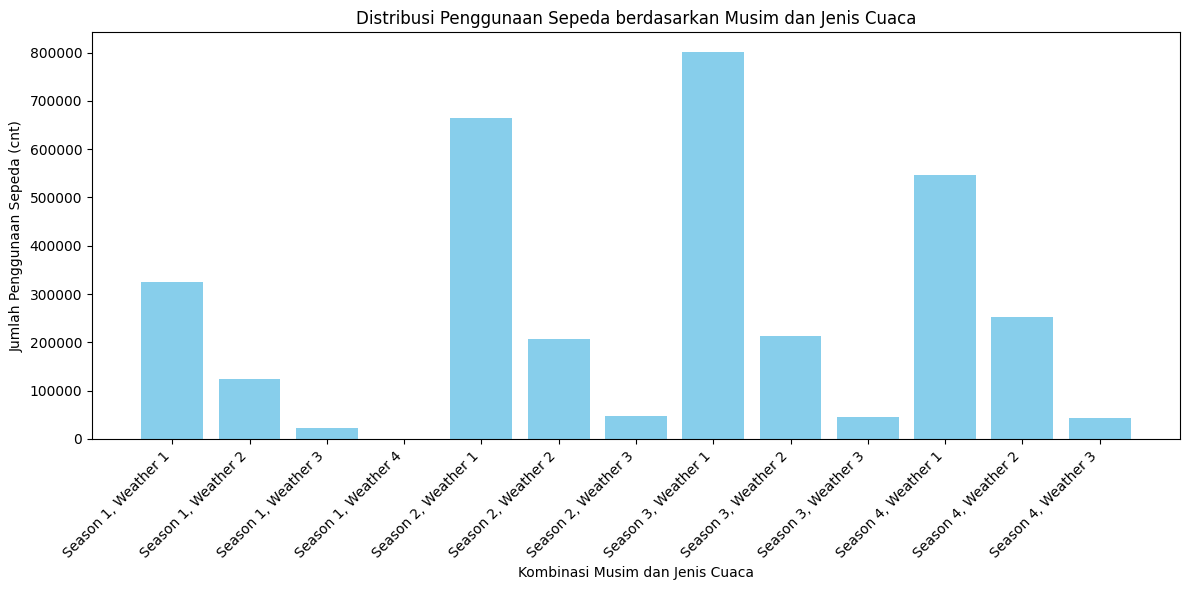

In [87]:
distribusi_penggunaan_sepeda = all_df.groupby(['season_x', 'weathersit_x'])['cnt_x'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(distribusi_penggunaan_sepeda.index, distribusi_penggunaan_sepeda['cnt_x'], color='skyblue')
plt.xlabel('Kombinasi Musim dan Jenis Cuaca')
plt.ylabel('Jumlah Penggunaan Sepeda (cnt)')
plt.title('Distribusi Penggunaan Sepeda berdasarkan Musim dan Jenis Cuaca')

labels = [f"Season {s}, Weather {w}" for s, w in zip(distribusi_penggunaan_sepeda['season_x'], distribusi_penggunaan_sepeda['weathersit_x'])]
plt.xticks(distribusi_penggunaan_sepeda.index, labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Conclusion

**Conclution pertanyaan 1**
- Terlihat adanya variasi dalam penggunaan sepeda sepanjang tahun, dengan puncak penggunaan terjadi pada musim semi dan musim panas, sementara penggunaan cenderung menurun selama musim gugur dan musim dingin.
- Ini menunjukkan bahwa faktor-faktor seperti suhu, cuaca, dan lamanya hari cahaya matahari memengaruhi kecenderungan orang untuk menggunakan sepeda.

**Conclution pertanyaan 2**
- Pola penggunaan sepeda berbeda antara hari kerja, hari biasa, dan hari libur.
- Penggunaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur, yang mungkin karena penggunaan sepeda sebagai alat transportasi untuk pergi bekerja.
- Penggunaan sepeda juga cenderung menurun pada hari libur, mungkin karena orang cenderung melakukan kegiatan lain atau menghabiskan waktu di rumah.


**Conclution pertanyaan 3**
- Kondisi cuaca memiliki pengaruh signifikan terhadap tingkat penggunaan sepeda.
- Penggunaan sepeda cenderung tinggi pada hari-hari dengan cuaca yang baik, seperti cerah dan hangat, dan cenderung rendah pada hari-hari dengan cuaca buruk, seperti hujan atau angin kencang.
- Hal ini menunjukkan bahwa faktor cuaca adalah pertimbangan penting bagi individu yang menggunakan sepeda sebagai sarana transportasi atau kegiatan rekreasi.

**Conclution pertanyaan 3**
 - Distribusi penggunaan sepeda bervariasi berdasarkan musim dan jenis cuaca.

-Penggunaan sepeda cenderung lebih tinggi pada musim semi dan musim panas dengan cuaca cerah, sementara menurun pada musim gugur dan musim dingin dengan cuaca yang tidak mendukung.
Hal ini menunjukkan bahwa faktor musim dan kondisi cuaca berperan dalam pola penggunaan sepeda.

**Keterangan :**

Dari Hasil data yang telah dilakukan proses wrangling dari gathering data, assesing data , dan cleaning data , data mempunyai kondisi yang cukup baik tidak ada duplikasi dan missing value , masalah yang ada pada kekeliruan tipe data objject untuk dtime dan data sudah diperbaiki pada proses cleaning data, sehingga saat memvisualisasi data, data sudah dalam keadaan yang baik

# RFM

-  1. Recency (Ketajaman): Menghitung Pengunaan Sepeda per Hari.
-  2. Frequency (Frekuensi): Menghitung Pengunaan sepeda per Jam.
-  3. Monetary (Moneter): Total Penggunaan Sepeda per Bulan

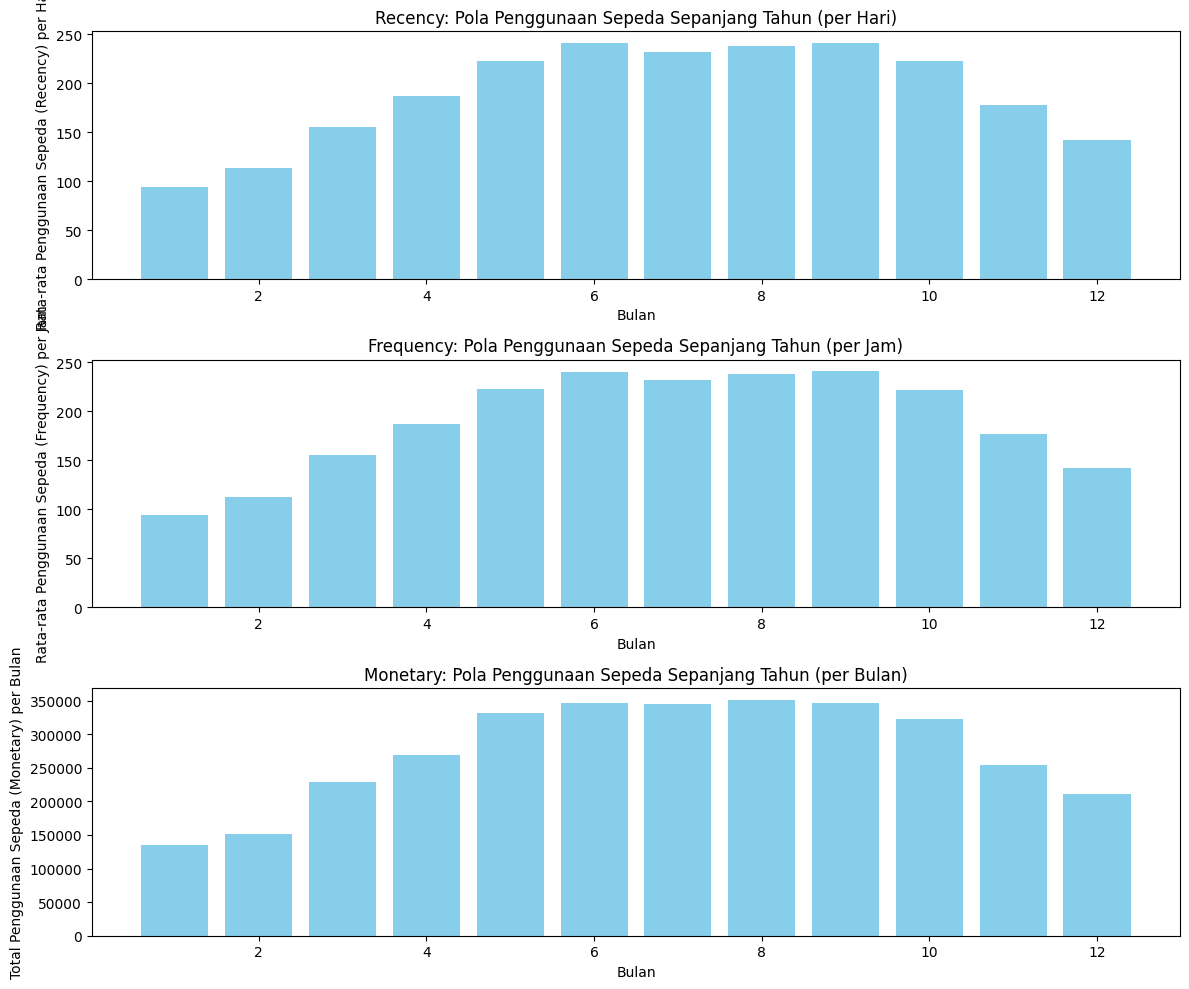

In [91]:
all_df['dteday'] = pd.to_datetime(all_df['dteday'])


monthly_days_recency = all_df.groupby(all_df['dteday'].dt.month)['cnt_x'].mean()


monthly_hours_frequency = all_df.groupby(all_df['dteday'].dt.month)['cnt_x'].mean()


monthly_days_monetary = all_df.groupby(all_df['dteday'].dt.month)['cnt_x'].sum()


plt.figure(figsize=(12, 10))

# Subplot untuk Recency (per Hari)
plt.subplot(3, 1, 1)
plt.bar(monthly_days_recency.index, monthly_days_recency.values, color='skyblue')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penggunaan Sepeda (Recency) per Hari')
plt.title('Recency: Pola Penggunaan Sepeda Sepanjang Tahun (per Hari)')

# Subplot untuk Frequency (per Jam)
plt.subplot(3, 1, 2)
plt.bar(monthly_hours_frequency.index, monthly_hours_frequency.values, color='skyblue')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penggunaan Sepeda (Frequency) per Jam')
plt.title('Frequency: Pola Penggunaan Sepeda Sepanjang Tahun (per Jam)')

# Subplot untuk Monetary (per Bulan)
plt.subplot(3, 1, 3)
plt.bar(monthly_days_monetary.index, monthly_days_monetary.values, color='skyblue')
plt.xlabel('Bulan')
plt.ylabel('Total Penggunaan Sepeda (Monetary) per Bulan')
plt.title('Monetary: Pola Penggunaan Sepeda Sepanjang Tahun (per Bulan)')

plt.tight_layout()
plt.show()

# Get Data Dasboard

In [99]:
all_df.to_csv("all_data.csv", index=False)